                   Analisis de la evolución de precios en el Mercado de Abasto Central

                                Período Diciembre 2020- Abril 2021

In [284]:
import csv
import sys
import openpyxl
%matplotlib inline
import plotnine as p9

In [285]:
completedata = pd.read_csv("DATASET PRECIOS_MAC-Hoja 3.csv", decimal=".")

Hicimos un recorte del dataset considerando solo una fecha por mes y tomando como criterio la mayor disponibilidad de datos


In [286]:
data = pd.read_csv("DATASET PRECIOS_MAC-split_completedata_average.csv", decimal=".")

In [287]:
data

,Mes,Fecha,Calculo,Papa hf córdoba,Tomate redondo comercial,Tomate regondo 1ra,Tomate perita comercial,Tomate perita 1ra,Cebolla común,Zapallo anco,...,Pimiento rojo,Lechuga,Acelga,Choclo,Naranja jugo comercial,Naranja jugo 1ra,Banana Boliviana,Banana Ecuador,Manzana comercial,Manzana 1ra
0,Diciembre,4/12/2020,Promedio,750.00,600.00,800.0,630.00,800.00,458.33,766.67,...,1285.71,295.00,135.0,710.00,691.67,920.00,1350.0,1620.00,2320.00,2966.67
1,Enero,28/01/2021,Promedio,520.00,800.00,1125.0,850.00,1275.00,650.00,450.00,...,990.00,414.29,150.0,607.14,1400.00,1616.67,1250.0,1633.33,2433.33,3025.00
2,Febrero,9/02/2021,Promedio,511.67,618.75,850.0,587.50,838.57,716.67,578.57,...,911.11,556.25,300.0,778.57,1300.00,1683.33,1075.0,1600.00,1920.00,2850.00
3,Marzo,30/03/2021,Promedio,540.00,1025.00,1400.0,766.67,1012.50,666.67,385.71,...,1214.29,771.43,150.0,1080.00,1325.00,1633.33,1190.0,1900.00,1350.00,2260.00
4,Abril,13/04/2021,Promedio,558.33,840.00,1160.0,650.00,908.33,571.43,350.00,...,1216.67,716.67,112.5,962.50,1500.00,1966.67,1180.0,1900.00,1433.33,2325.00


In [288]:
data.dtypes

Mes                          object
Fecha                        object
Calculo                      object
Papa hf córdoba             float64
Tomate redondo comercial    float64
Tomate regondo 1ra          float64
Tomate perita comercial     float64
Tomate perita 1ra           float64
Cebolla común               float64
Zapallo anco                float64
Zanahoria bs.x20            float64
Zapallito                   float64
Pimiento rojo               float64
Lechuga                     float64
Acelga                      float64
Choclo                      float64
Naranja jugo comercial      float64
Naranja jugo 1ra            float64
Banana Boliviana            float64
Banana Ecuador              float64
Manzana comercial           float64
Manzana 1ra                 float64
dtype: object

In [289]:
# reemplazar "Nan" por NaN
data.replace("Nan", np.nan, inplace = True)

Generamos una lista de los productos


In [290]:
productos= data.columns.tolist()

In [291]:
productos

['Mes',
 'Fecha',
 'Calculo',
 'Papa hf córdoba',
 'Tomate redondo comercial',
 'Tomate regondo 1ra',
 'Tomate perita comercial',
 'Tomate perita 1ra',
 'Cebolla común',
 'Zapallo anco',
 'Zanahoria bs.x20',
 'Zapallito',
 'Pimiento rojo',
 'Lechuga',
 'Acelga',
 'Choclo',
 'Naranja jugo comercial',
 'Naranja jugo 1ra',
 'Banana Boliviana',
 'Banana Ecuador',
 'Manzana comercial',
 'Manzana 1ra']

In [292]:
productos = productos[3:]

In [293]:
productos

['Papa hf córdoba',
 'Tomate redondo comercial',
 'Tomate regondo 1ra',
 'Tomate perita comercial',
 'Tomate perita 1ra',
 'Cebolla común',
 'Zapallo anco',
 'Zanahoria bs.x20',
 'Zapallito',
 'Pimiento rojo',
 'Lechuga',
 'Acelga',
 'Choclo',
 'Naranja jugo comercial',
 'Naranja jugo 1ra',
 'Banana Boliviana',
 'Banana Ecuador',
 'Manzana comercial',
 'Manzana 1ra']

In [294]:
data.describe()

,Papa hf córdoba,Tomate redondo comercial,Tomate regondo 1ra,Tomate perita comercial,Tomate perita 1ra,Cebolla común,Zapallo anco,Zanahoria bs.x20,Zapallito,Pimiento rojo,Lechuga,Acelga,Choclo,Naranja jugo comercial,Naranja jugo 1ra,Banana Boliviana,Banana Ecuador,Manzana comercial,Manzana 1ra
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.00000
mean,576.000000,776.750000,1067.000000,696.834000,966.88000,612.620000,506.190000,440.934000,500.334000,1123.556000,550.728000,169.500000,827.642000,1243.334000,1564.00000,1209.000000,1730.66600,1891.332000,2685.33400
std,98.942632,174.909798,245.601303,108.340922,190.23644,100.805617,169.673773,71.381768,138.926087,162.916622,200.180388,74.548642,191.533335,318.054717,386.87839,100.895986,155.03457,495.264098,364.82442
min,511.670000,600.000000,800.000000,587.500000,800.00000,458.330000,350.000000,350.000000,400.000000,911.110000,295.000000,112.500000,607.140000,691.670000,920.00000,1075.000000,1600.00000,1350.000000,2260.00000
25%,520.000000,618.750000,850.000000,630.000000,838.57000,571.430000,385.710000,408.000000,400.000000,990.000000,414.290000,135.000000,710.000000,1300.000000,1616.67000,1180.000000,1620.00000,1433.330000,2325.00000
50%,540.000000,800.000000,1125.000000,650.000000,908.33000,650.000000,450.000000,435.000000,441.670000,1214.290000,556.250000,150.000000,778.570000,1325.000000,1633.33000,1190.000000,1633.33000,1920.000000,2850.00000
75%,558.330000,840.000000,1160.000000,766.670000,1012.50000,666.670000,578.570000,470.000000,530.000000,1216.670000,716.670000,150.000000,962.500000,1400.000000,1683.33000,1250.000000,1900.00000,2320.000000,2966.67000
max,750.000000,1025.000000,1400.000000,850.000000,1275.00000,716.670000,766.670000,541.670000,730.000000,1285.710000,771.430000,300.000000,1080.000000,1500.000000,1966.67000,1350.000000,1900.00000,2433.330000,3025.00000


Realizando un line plot podemos observar la evolucion de precios a lo largo de los meses, sin embargo este gráfico aporta muy poca información ya que los datos aún no se encuentran normalizados. 

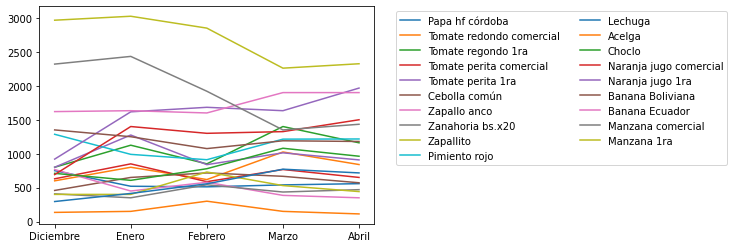

In [295]:
for column in productos:
    plt.plot(data['Mes'], data[column])
    plt.legend(productos,bbox_to_anchor=(1.05, 1), loc= 'best', ncol=2) 


Lo que haremos es transformar la suceción de precios en una suceción que tome como parámetro el valor inicial (en la fecha 0) y normalice los siguientes valores en función de ese valor inicial. Básicamente dividir cada valor de la columna por el valor inicial. 
De esta manera tenemos normalizada la suceción

In [296]:
from math import log

data_evolucion = copy.deepcopy(data)

for i in productos:
    data_evolucion[i] = data[i]/data.loc[0, i]
    
data_evolucion

,Mes,Fecha,Calculo,Papa hf córdoba,Tomate redondo comercial,Tomate regondo 1ra,Tomate perita comercial,Tomate perita 1ra,Cebolla común,Zapallo anco,...,Pimiento rojo,Lechuga,Acelga,Choclo,Naranja jugo comercial,Naranja jugo 1ra,Banana Boliviana,Banana Ecuador,Manzana comercial,Manzana 1ra
0,Diciembre,4/12/2020,Promedio,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Enero,28/01/2021,Promedio,0.693333,1.333333,1.40625,1.349206,1.593750,1.418192,0.586954,...,0.770003,1.404373,1.111111,0.855127,2.024087,1.757250,0.925926,1.008228,1.048849,1.019662
2,Febrero,9/02/2021,Promedio,0.682227,1.031250,1.06250,0.932540,1.048212,1.563655,0.754653,...,0.708643,1.885593,2.222222,1.096577,1.879509,1.829707,0.796296,0.987654,0.827586,0.960673
3,Marzo,30/03/2021,Promedio,0.720000,1.708333,1.75000,1.216937,1.265625,1.454563,0.503098,...,0.944451,2.615017,1.111111,1.521127,1.915653,1.775359,0.881481,1.172840,0.581897,0.761797
4,Abril,13/04/2021,Promedio,0.744440,1.400000,1.45000,1.031746,1.135413,1.246765,0.456520,...,0.946302,2.429390,0.833333,1.355634,2.168664,2.137685,0.874074,1.172840,0.617815,0.783707


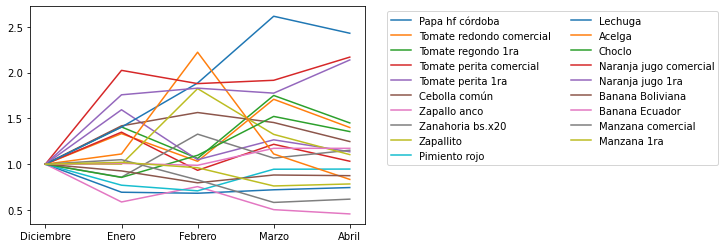

In [297]:
for column in productos:
    plt.plot(data_evolucion['Mes'], data_evolucion[column])
    plt.legend(productos,bbox_to_anchor=(1.05, 1), loc= 'best', ncol=2) 



Para evitar este spagetti de lineas clasificaremos los productos según la evolución media


Cálculo de la inflación 
En PORCENTAJES

In [298]:
data_inflacion = copy.deepcopy(data)
for j in productos:
    for i in range(len(data_inflacion['Mes'])):
        if i==0:
            data_inflacion.loc[i, j] = 0
        else:
            data_inflacion.loc[i,j] = (data.loc[i,j]/data.loc[i-1,j] -1) *100
        

In [299]:
data_inflacion

,Mes,Fecha,Calculo,Papa hf córdoba,Tomate redondo comercial,Tomate regondo 1ra,Tomate perita comercial,Tomate perita 1ra,Cebolla común,Zapallo anco,...,Pimiento rojo,Lechuga,Acelga,Choclo,Naranja jugo comercial,Naranja jugo 1ra,Banana Boliviana,Banana Ecuador,Manzana comercial,Manzana 1ra
0,Diciembre,4/12/2020,Promedio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Enero,28/01/2021,Promedio,-30.666667,33.333333,40.625000,34.920635,59.375000,41.819213,-41.304603,...,-22.999743,40.437288,11.111111,-14.487324,102.408663,75.725000,-7.407407,0.822840,4.884914,1.966178
2,Febrero,9/02/2021,Promedio,-1.601923,-22.656250,-24.444444,-30.882353,-34.229804,10.256923,28.571111,...,-7.968687,34.265852,100.000000,28.235662,-7.142857,4.123290,-14.000000,-2.040616,-21.095782,-5.785124
3,Marzo,30/03/2021,Promedio,5.536772,65.656566,64.705882,30.497021,20.741262,-6.976712,-33.333909,...,33.275894,38.684045,-50.000000,38.715851,1.923077,-2.970303,10.697674,18.750000,-29.687500,-20.701754
4,Abril,13/04/2021,Promedio,3.394444,-18.048780,-17.142857,-15.217760,-10.288395,-14.285929,-9.258251,...,0.195999,-7.098505,-25.000000,-10.879630,13.207547,20.408613,-0.840336,0.000000,6.172593,2.876106


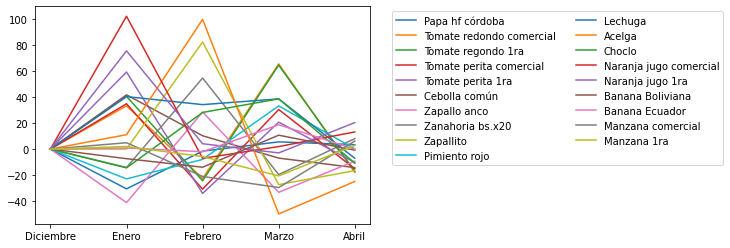

In [300]:
for column in productos:
    plt.plot(data_inflacion['Mes'], data_inflacion[column])
    plt.legend(productos,bbox_to_anchor=(1.05, 1), loc= 'best', ncol=2) 

Agregamos dos nuevas columnas con el cálculo de la inflación media y la evolución media

In [301]:
#Inflación media
data_inflacion = data_inflacion.assign(inflacion_media = data_inflacion.mean(axis =1) )
#Evolución media
data_evolucion = data_evolucion.assign(evolucion_media = data_evolucion.mean(axis =1) )


In [302]:
data_inflacion

,Mes,Fecha,Calculo,Papa hf córdoba,Tomate redondo comercial,Tomate regondo 1ra,Tomate perita comercial,Tomate perita 1ra,Cebolla común,Zapallo anco,...,Lechuga,Acelga,Choclo,Naranja jugo comercial,Naranja jugo 1ra,Banana Boliviana,Banana Ecuador,Manzana comercial,Manzana 1ra,inflacion_media
0,Diciembre,4/12/2020,Promedio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Enero,28/01/2021,Promedio,-30.666667,33.333333,40.625000,34.920635,59.375000,41.819213,-41.304603,...,40.437288,11.111111,-14.487324,102.408663,75.725000,-7.407407,0.822840,4.884914,1.966178,16.649881
2,Febrero,9/02/2021,Promedio,-1.601923,-22.656250,-24.444444,-30.882353,-34.229804,10.256923,28.571111,...,34.265852,100.000000,28.235662,-7.142857,4.123290,-14.000000,-2.040616,-21.095782,-5.785124,8.993045
3,Marzo,30/03/2021,Promedio,5.536772,65.656566,64.705882,30.497021,20.741262,-6.976712,-33.333909,...,38.684045,-50.000000,38.715851,1.923077,-2.970303,10.697674,18.750000,-29.687500,-20.701754,7.285463
4,Abril,13/04/2021,Promedio,3.394444,-18.048780,-17.142857,-15.217760,-10.288395,-14.285929,-9.258251,...,-7.098505,-25.000000,-10.879630,13.207547,20.408613,-0.840336,0.000000,6.172593,2.876106,-4.759221


In [303]:
data_evolucion

,Mes,Fecha,Calculo,Papa hf córdoba,Tomate redondo comercial,Tomate regondo 1ra,Tomate perita comercial,Tomate perita 1ra,Cebolla común,Zapallo anco,...,Lechuga,Acelga,Choclo,Naranja jugo comercial,Naranja jugo 1ra,Banana Boliviana,Banana Ecuador,Manzana comercial,Manzana 1ra,evolucion_media
0,Diciembre,4/12/2020,Promedio,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Enero,28/01/2021,Promedio,0.693333,1.333333,1.40625,1.349206,1.593750,1.418192,0.586954,...,1.404373,1.111111,0.855127,2.024087,1.757250,0.925926,1.008228,1.048849,1.019662,1.166499
2,Febrero,9/02/2021,Promedio,0.682227,1.031250,1.06250,0.932540,1.048212,1.563655,0.754653,...,1.885593,2.222222,1.096577,1.879509,1.829707,0.796296,0.987654,0.827586,0.960673,1.232743
3,Marzo,30/03/2021,Promedio,0.720000,1.708333,1.75000,1.216937,1.265625,1.454563,0.503098,...,2.615017,1.111111,1.521127,1.915653,1.775359,0.881481,1.172840,0.581897,0.761797,1.278446
4,Abril,13/04/2021,Promedio,0.744440,1.400000,1.45000,1.031746,1.135413,1.246765,0.456520,...,2.429390,0.833333,1.355634,2.168664,2.137685,0.874074,1.172840,0.617815,0.783707,1.212656


Graficamos

Text(0, 0.5, 'Variación porcentual de precios')

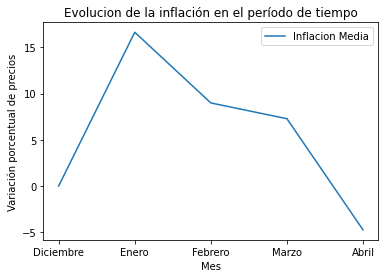

In [304]:
plt.plot(data_inflacion['Mes'], data_inflacion['inflacion_media'])
plt.legend(['Inflacion Media'], loc= 'best', ncol=2) 
plt.title('Evolucion de la inflación en el período de tiempo')
plt.xlabel('Mes')
plt.ylabel('Variación porcentual de precios')


Text(0, 0.5, 'Variación normalizada de precios')

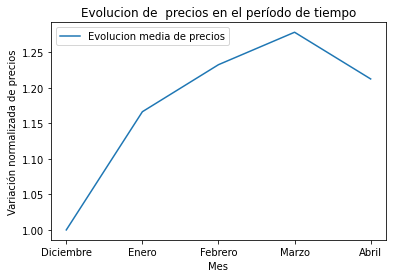

In [305]:
plt.plot(data_inflacion['Mes'], data_evolucion['evolucion_media'])
plt.legend(['Evolucion media de precios'], loc= 'best', ncol=2) 
plt.title('Evolucion de  precios en el período de tiempo')
plt.xlabel('Mes')
plt.ylabel('Variación normalizada de precios')

Comparando este gráfico con la evolución de precios normalizada podemos entender que
si bien los precios continuaron incrementandose en el período de tiempo con una tendencia visible,
la inflación en tanto variación porcentual de precios no tuvo un incremento constante sino que en ocasiones fue negativa 

Podemos observar que la evolución de precios media tiene una mayor pendiente  entre diciembre y enero,
un amecetamiento de la curva entre enero y marzo
y una pendiente negativa fundamentalmente entre marzo y abril
hay una caida notable. ¿Qué nos dice esto? 
Que si bien los precios han continuado incrementándose la asceleración de dicho incremento no es constante
e incluso a veces es negativa, pudiendose comprobar contrastando ambos gráficos en el período marzo-abril.




Ahora clasificaremos los productos en grupos segun mayor o menor inflacion y observaremos su comportamiento


Primero creamos los tres grupos inflacion baja,media y alta
donde clasificamos los productos
tomando como criterio la inflación final

In [306]:
fila_infla= data_inflacion.iloc[4]

In [307]:
fila_infla = fila_infla[3:]
fila_infla

Papa hf córdoba              3.394444
Tomate redondo comercial    -18.04878
Tomate regondo 1ra         -17.142857
Tomate perita comercial     -15.21776
Tomate perita 1ra          -10.288395
Cebolla común              -14.285929
Zapallo anco                -9.258251
Zanahoria bs.x20             8.045977
Zapallito                  -16.666038
Pimiento rojo                0.195999
Lechuga                     -7.098505
Acelga                          -25.0
Choclo                      -10.87963
Naranja jugo comercial      13.207547
Naranja jugo 1ra            20.408613
Banana Boliviana            -0.840336
Banana Ecuador                    0.0
Manzana comercial            6.172593
Manzana 1ra                  2.876106
inflacion_media             -4.759221
Name: 4, dtype: object

In [308]:
bins = np.linspace(min(fila_infla), max(fila_infla), 4)
bins

array([-25.        ,  -9.86379564,   5.27240872,  20.40861308])

In [309]:
group_names = ['Baja', 'Media', 'Alta']

In [310]:
dat1=[]
for i in productos:
    dat1.append(data_inflacion.loc[4, i])

In [311]:
dat1

[3.3944444444444555,
 -18.048780487804883,
 -17.14285714285714,
 -15.217759922782935,
 -10.288395061728394,
 -14.285928570357154,
 -9.258251017603891,
 8.045977011494255,
 -16.66603773584905,
 0.1959993082377487,
 -7.098505373138197,
 -25.0,
 -10.879629629629628,
 13.207547169811317,
 20.40861307880222,
 -0.8403361344537785,
 0.0,
 6.172592592592596,
 2.8761061946902755]

In [312]:
for i in productos:
    data_inflacion.loc[4, i]

In [313]:
infla_baja = []
infla_media=[]
infla_alta =[]

In [314]:
for i in productos:
    if data_inflacion.loc[4,i] <= bins[1]:
        infla_baja.append(i)
    if data_inflacion.loc[4,i] > bins[1] and data_inflacion.loc[4,i] <= bins[2]:
        infla_media.append(i)
    if data_inflacion.loc[4,i]> bins[2]:
        infla_alta.append(i)

Graficamos

Productos con menor inflación final 

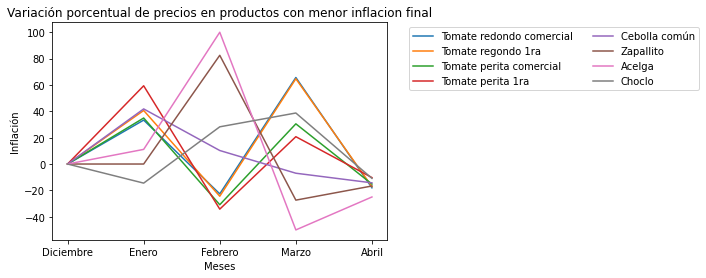

In [315]:
for i in infla_baja:
    plt.plot(data_inflacion['Mes'], data_inflacion[i])
    plt.legend(infla_baja,bbox_to_anchor=(1.05, 1), loc= 'best', ncol=2)
    plt.title('Variación porcentual de precios en productos con menor inflacion final')
    plt.xlabel('Meses')
    plt.ylabel('Inflación')

Observamos y comparamos la evolucion de precios en los mismos productos

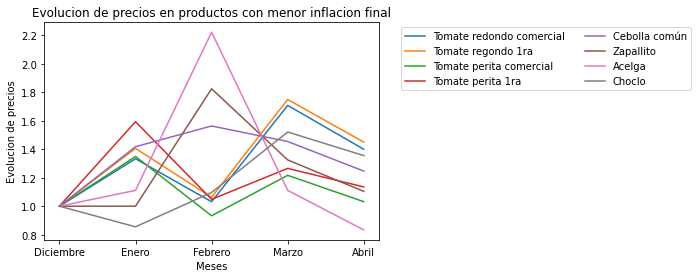

In [316]:
for i in infla_baja:
    plt.plot(data_evolucion['Mes'], data_evolucion[i])
    plt.legend(infla_baja,bbox_to_anchor=(1.05, 1), loc= 'best', ncol=2)
    plt.title('Evolucion de precios en productos con menor inflacion final')
    plt.xlabel('Meses')
    plt.ylabel('Evolucion de precios')

Productos con inflacion final intermedia

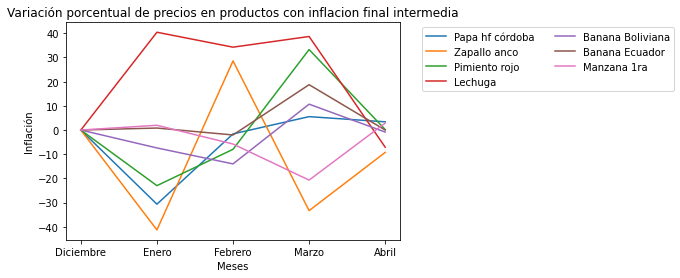

In [317]:
for i in infla_media:
    plt.plot(data_inflacion['Mes'], data_inflacion[i])
    plt.legend(infla_media,bbox_to_anchor=(1.05, 1), loc= 'best', ncol=2)
    plt.title('Variación porcentual de precios en productos con inflacion final intermedia')
    plt.xlabel('Meses')
    plt.ylabel('Inflación')

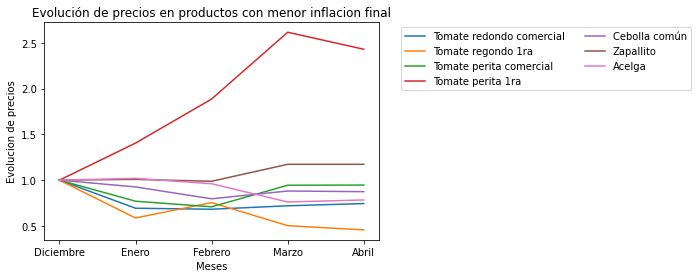

In [318]:
for i in infla_media:
    plt.plot(data_inflacion['Mes'], data_evolucion[i])
    plt.legend(infla_baja,bbox_to_anchor=(1.05, 1), loc= 'best', ncol=2)
    plt.title('Evolución de precios en productos con menor inflacion final')
    plt.xlabel('Meses')
    plt.ylabel('Evolucion de precios')

Productos con inflacion final ALTA

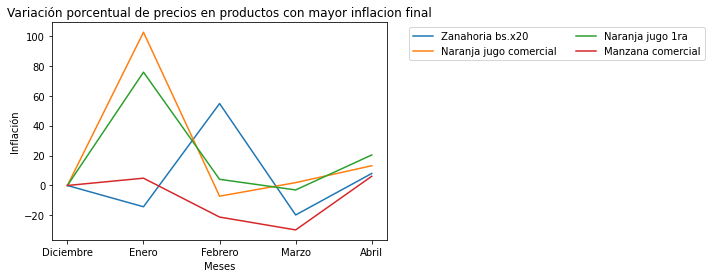

In [319]:
for i in infla_alta:
    plt.plot(data_inflacion['Mes'], data_inflacion[i])
    plt.legend(infla_alta,bbox_to_anchor=(1.05, 1), loc= 'best', ncol=2)
    plt.title('Variación porcentual de precios en productos con mayor inflacion final')
    plt.xlabel('Meses')
    plt.ylabel('Inflación')

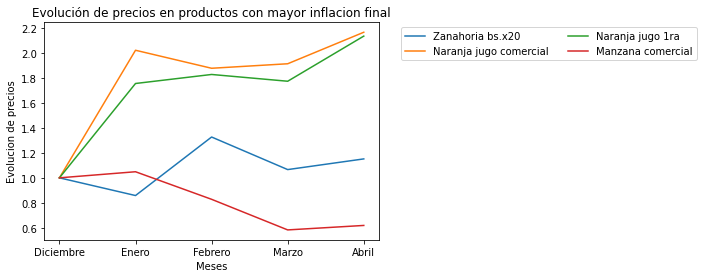

In [321]:
for i in infla_alta:
    plt.plot(data_inflacion['Mes'], data_evolucion[i])
    plt.legend(infla_alta,bbox_to_anchor=(1.05, 1), loc= 'best', ncol=2)
    plt.title('Evolución de precios en productos con mayor inflacion final')
    plt.xlabel('Meses')
    plt.ylabel('Evolucion de precios')

Seria interesante obtener:
    una tabla de inflación acumulada en cada producto en el período analizado
    mayores parametros sobre que verduras son estacionales en el período analizado
